<a href="https://colab.research.google.com/github/Eudson7/Python-Projets/blob/main/Mapa_interativo_muito_simples_com_ponto_e_linha_usando_folium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mapa interativo muito simples usando folium

Uma simples abordagem para criação de mapa interativo usando apenas biblioteca Folium e nada mais.

Segue local da documentação da biblioteca folium: https://python-visualization.github.io/folium/

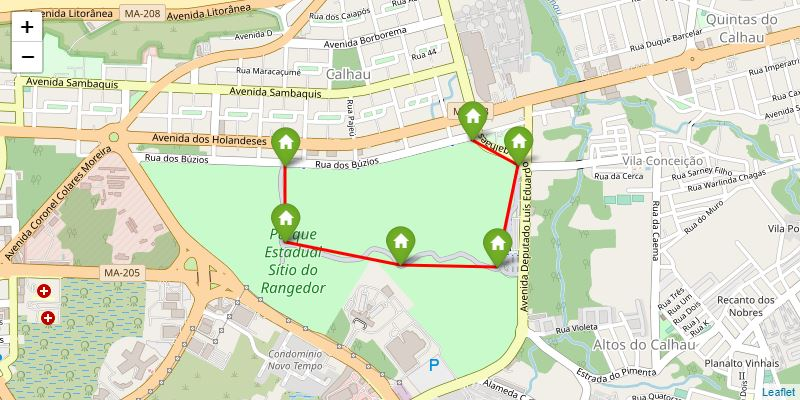

# Inicio
Primeiro deve-se instalar a biblioteca Folium

In [ ]:
!pip install folium

Após instalação, importar a biblioteca

In [27]:
import folium

Abaixo criei uma lista de coordenadas de seis pontos da pista corrida do parque Rangedor que fica em São luis-MA (BR).

In [23]:
# criar lista de pontos em coordenadas latitude e longitude
pontos = [[-2.493696, -44.263902],[-2.494768, -44.261961],[-2.499173, -44.262842],[-2.499068, -44.267026],[-2.498071, -44.271961],[-2.494834, -44.271929]]

# visualizar lista de pontos
pontos

[[-2.493696, -44.263902],
 [-2.494768, -44.261961],
 [-2.499173, -44.262842],
 [-2.499068, -44.267026],
 [-2.498071, -44.271961],
 [-2.494834, -44.271929]]

Para poder criar (plotar) o mapa, é necessario informar as coordenadas de localização (centroid) e o nível de zoom. 

Portanto vou calcular a média das coordenadas para encontrar um centroid aproximado, o objetivo é ter uma referencia do local do mapa, não é necessario precisão. Um cálculo simples sem usar outras bibliotecas para encontar o centroid dos pontos.

In [29]:
# centro das coordenadas (calculo simples, valor aproximado)
l = len(pontos)
l1=0
l2=0
for index,r in enumerate(pontos):
    l1 = (pontos[index][0]+l1)
    l2 = (pontos[index][1]+l2)
centro = [l1/l,l2/l]
del l1, l2

# visualizar centro
centro

[-2.496601666666667, -44.266603499999995]

Agora temos nossa lista de coordenadas e o centro das coordendas que será nossa localização central do nosso mapa. Tudo certo, vamos criar o mapa!

Então abaixo na sequencia faremos 3 etapas juntas:

1 - criar o nosso mapa "m" informando a localização usando o "centro" dos pontos e com nivel de zoom 15.

2 - inserir os pontos (marcadores - maker) usando laço "for". Incluindo um Popup para cada marcador.

3 - inserir as linhas basedas na ordem da lista de coordenadas e com a cor vermelha (red)

In [28]:
# 1 criar mapa, indicar centro e o nivel de zoom
f = folium.Figure(width=800, height=400) # definindo tamanho de visualiação do mapa do mapa
m = folium.Map(location=centro, zoom_start=15).add_to(f) # criar mapa e adicionar o tamanho de visualiação

# caso queira o mapa no tamanho padrão de tela cheia, basta comentar os dois de cima e descomentar o debaixo desse texto.
#m = folium.Map(location=centro, zoom_start=15) #tamanho padrão

# 2 inserir pontos (maker)
for index,r in enumerate(pontos):
    folium.Marker(pontos[index],
                  icon = folium.Icon(color='green',icon='home'),
                  popup=('Ponto{} da lista'.format(index))                  
                  ).add_to(m)

# 3 inserir linhas
folium.PolyLine(pontos, color='red').add_to(m)

# visualizar mapa
m